<h3>A preface: Everything is done in 10 or 20 epochs because of the lack of time. I appologize for that in advance.</h3>

<h1>Task 1</h1>

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

batch_size = 8

# Build a simple CNN with strided convolution layers 
def define_model():
    inputs = tf.keras.Input(shape=(28,28,1),name='Inputs')
    x = layers.Conv2D(16,kernel_size=(5,5),activation='relu',padding='same',strides=1,name='L1')(inputs)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=2,name='L2')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L3')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=2,name='L4')(x)
    x = layers.Flatten()(x)
    embedding_layer = layers.Dense(2, name='Embedding')(x)
    outputs = layers.Dense(10,activation='softmax')(embedding_layer)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


def mnist_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    x_train = x_train/255.0
    x_test = x_test/255.0
    return x_train, y_train, x_test, y_test


# Train the model on MNIST data using standard cross-entropy loss
def train_model(model, x_train, y_train, x_test, y_test, epochs=10):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


x_train, y_train, x_test, y_test = mnist_data()
model = define_model()
train_model(model, x_train, y_train, x_test, y_test, 10)




Epoch 1/10
7500/7500 [==============================] - 39s 5ms/step - loss: 0.6888 - accuracy: 0.7824 - val_loss: 0.3921 - val_accuracy: 0.8943
Epoch 2/10
7500/7500 [==============================] - 38s 5ms/step - loss: 0.3534 - accuracy: 0.9089 - val_loss: 0.2811 - val_accuracy: 0.9314
Epoch 3/10
7500/7500 [==============================] - 38s 5ms/step - loss: 0.2685 - accuracy: 0.9320 - val_loss: 0.2456 - val_accuracy: 0.9388
Epoch 4/10
7500/7500 [==============================] - 40s 5ms/step - loss: 0.2238 - accuracy: 0.9430 - val_loss: 0.2062 - val_accuracy: 0.9509
Epoch 5/10
7500/7500 [==============================] - 42s 6ms/step - loss: 0.1964 - accuracy: 0.9506 - val_loss: 0.1956 - val_accuracy: 0.9538
Epoch 6/10
7500/7500 [==============================] - 39s 5ms/step - loss: 0.1771 - accuracy: 0.9546 - val_loss: 0.1828 - val_accuracy: 0.9566
Epoch 7/10
7500/7500 [==============================] - 39s 5ms/step - loss: 0.1619 - accuracy: 0.9594 - val_loss: 0.1924 - val_ac

In [12]:
model_for_embeddings = tf.keras.Model(inputs=model.input,
                                            outputs=model.get_layer('Embedding').output)

1875/1875 [==============================] - 6s 3ms/step


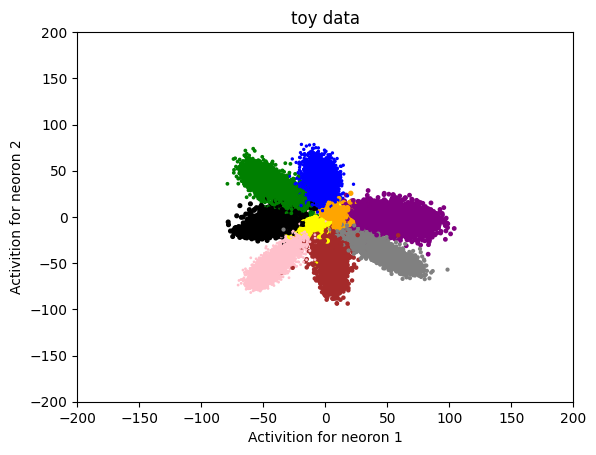

In [15]:
labels = y_train.argmax(axis=1)
outs = model_for_embeddings.predict(x_train)

colors = {
    0: 'red',
    1: 'pink',
    2: 'blue',
    3: 'green',
    4: 'grey',
    5: 'brown',
    6: 'purple',
    7: 'black',
    8: 'orange',
    9: 'yellow',
}

%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(outs[:,0], outs[:,1], labels, c=[colors[x] for x in labels])
ax.set_xlabel('Activition for neoron 1')
ax.set_ylabel('Activition for neoron 2')
ax.set_title('toy data')
ax.set_xlim(-200 ,200)
ax.set_ylim(-200 ,200)
plt.show()

<h1>Task 2</h1>

In [45]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


batch_size = 8
alpha = 1
learning_rate = 0.0001

@tf.function
def contrastive_loss(y_true, y_pred):
    y_true = tf.argmax(y_true, axis=1)
    L=0
    for i in range(batch_size):
        for j in range(i+1, batch_size):
            D = tf.square(tf.norm(y_pred[i,:] - y_pred[j,:]))
            if y_true[i] == y_true[j]:
                L = L+D
            else:
                L = L+tf.maximum(0.0, alpha-D)
    return L


def mnist_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    x_train = x_train/255.0
    x_test = x_test/255.0
    return x_train, y_train, x_test, y_test

# Build a simple CNN with strided convolution layers 
def define_model2():
    inputs = tf.keras.Input(shape=(28,28,1),name='Inputs')
    x = layers.Conv2D(16,kernel_size=(5,5),activation='relu',padding='same',strides=1,name='L1')(inputs)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=2,name='L2')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L3')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=2,name='L4')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(2, name='Embedding')(x)
    x = layers.Dense(10,activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=x)
    return model

x_train, y_train, x_test, y_test = mnist_data()


# Train the model on MNIST data using standard cross-entropy loss
def train_model2(model, x_train, y_train, x_test, y_test, epochs=100):
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=contrastive_loss, metrics=['accuracy'])
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


model2 = define_model2()
train_model2(model2, x_train, y_train, x_test, y_test, 10)




Epoch 1/10
Tensor("y_pred:0", shape=(8, 10), dtype=float32)


UnboundLocalError: in user code:

    File "h:\Uni\WiSe 2024\ML LAB\ml_lab_venv\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Amir Hossein\AppData\Local\Temp\ipykernel_10000\487179120.py", line 22, in contrastive_loss  *
        L = L+D

    UnboundLocalError: 'L' is used before assignment


1875/1875 [==============================] - 6s 3ms/step


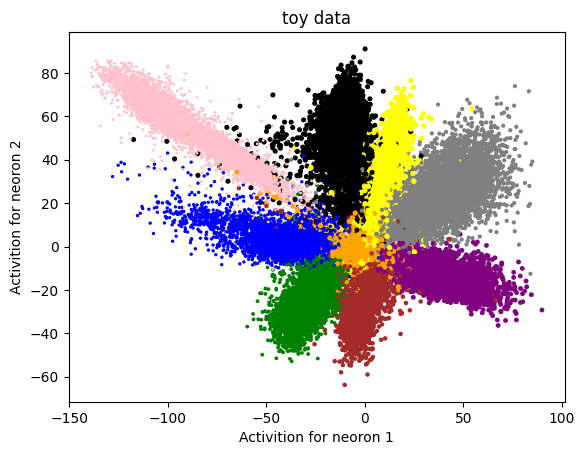

In [42]:
labels = y_train.argmax(axis=1)
model2_for_embeddings = tf.keras.Model(inputs=model2.input,
                                            outputs=model2.get_layer('Embedding').output)
outs = model2_for_embeddings.predict(x_train)

colors = {
    0: 'red',
    1: 'pink',
    2: 'blue',
    3: 'green',
    4: 'grey',
    5: 'brown',
    6: 'purple',
    7: 'black',
    8: 'orange',
    9: 'yellow',
}

%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(outs[:,0], outs[:,1], labels, c=[colors[x] for x in labels])
ax.set_xlabel('Activition for neoron 1')
ax.set_ylabel('Activition for neoron 2')
ax.set_title('toy data')
plt.show()